In [14]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import hist
s = hist.tag.Slicer()

import pickle, gzip

import os

In [15]:
wcstring = {}
wcstring['cHWtil'] = r'$\tilde{c}_{HW}$'
wcstring['cHW'] = r'$c_{HW}$'
wcstring['cHBtil'] = r'$\tilde{c}_{HB}$'
wcstring['cHB'] = r'$c_{HB}$'
wcstring['cHWBtil'] = r'$\tilde{c}_{HWB}$'
wcstring['cHWB'] = r'$c_{HWB}$'
wcstring['cHj1'] = r'$c_{Hj1}$'
wcstring['cHj3'] = r'$c_{Hj3}$'
wcstring['cHbox'] = r'$c_{Hbox}$'
wcstring['cHDD'] = r'$c_{HDD}$'
wcstring['cHd'] = r'$c_{Hd}$'
wcstring['cHu'] = r'$c_{Hu}$'
wcstring['cHudRe'] = r'Re($c_{Hud}$)'
wcstring['cHudIm'] = r'Im($c_{Hud}$)'
wcstring['cdBRe'] = r'Re($c_{dB}$)'
wcstring['cdBIm'] = r'Im($c_{dB}$)'
wcstring['cuBRe'] = r'Re($c_{uB}$)'
wcstring['cuBIm'] = r'Im($c_{uB}$)'
wcstring['cuWRe'] = r'Re($c_{uW}$)'
wcstring['cuWIm'] = r'Im($c_{uW}$)'
wcstring['cdWRe'] = r'Re($c_{dW}$)'
wcstring['cdWIm'] = r'Im($c_{dW}$)'

In [16]:
smpoint = {}
for k in wcstring.keys():
    smpoint[k] = 0.0

In [17]:
samp1 = "VBF_SMEFTsim_topU3l_NP1"
output1 = pickle.load(gzip.open("coffea/"+samp1+".pkl.gz"))

samp2 = "VBF_SMEFTsim_topU3l_NP1_start1"
output2 = pickle.load(gzip.open("coffea/"+samp2+".pkl.gz"))

In [18]:
h1 = output1['hpt']
h2 = output2['hpt']

In [64]:
def plot_with_ratio(wc, wcpoint, name, h1in, h2in, h3in, rebin=1):
    fig, ax = plt.subplots(3,1,sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]}, figsize=(10,12))
    fig.subplots_adjust(hspace=0.1)

    var = "hpt"
    hist1 = h1in[{var:s[::hist.rebin(rebin)]}]
    hist2 = h2in[{var:s[::hist.rebin(rebin)]}]
    hist3 = h3in[{var:s[::hist.rebin(rebin)]}]

    the_bins = hist3.axes[0].edges
    bin_centers = the_bins[:-1] + 0.5*np.diff(the_bins)

    sm = np.array(list(hist1.eval(None).values())[0][1:-1])
    hist1 = np.array(list(hist1.eval(wcpoint).values())[0][1:-1])
    hist2 = np.array(list(hist2.eval(wcpoint).values())[0][1:-1])
    hist3 = np.array(hist3.values())

    sm_norm = sm/np.sum(sm)
    hist1_norm = hist1/np.sum(hist1)
    hist2_norm = hist2/np.sum(hist2)
    hist3_norm = hist3/np.sum(hist3)
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=sm_norm,
               label='SM',
               histtype='step',
               color='black',
               lw=2,
               linestyle='dotted',
               )  
    #ax[0].errorbar(bin_centers, sm, yerr=sm_err, linestyle='',color='black',lw=2)
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=hist1_norm,
               label='RW from 0',
               histtype='step',
               color='tab:red',
               lw=2
               )        
    #ax[0].errorbar(bin_centers, hist1_norm, yerr=hist1_norm_err, linestyle='',color='tab:red',lw=2)
    
    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=hist2_norm,
               label='RW from 1',
               histtype='step',
               color='tab:blue',
               lw=2
               )   
    #ax[0].errorbar(bin_centers, hist2_norm, yerr=hist2_norm_err, linestyle='',color='tab:blue',lw=2)

    ax[0].hist(the_bins[:-1],
               bins=the_bins,
               weights=hist3_norm,
               label='Simulated '+wcstring[wc]+'=1',
               histtype='step',
               color='tab:orange',
               lw=2
               )   
    #ax[0].errorbar(bin_centers, d_norm, yerr=d_norm_err, linestyle='',color='tab:orange',lw=2)
       
    # Ratio panel
    hist1_rat = np.divide(hist1_norm,sm_norm)#*rw[{'wc':'SM',var:sum}].value
    #hist1_rat_err = np.divide(hist1_norm_err,sm)#*rw[{'wc':'SM',var:sum}].value
    hist2_rat = np.divide(hist2_norm,sm_norm)#*rw[{'wc':'SM',var:sum}].value
    #hist2_rat_err = np.divide(hist2_norm_err,sm)#*rw[{'wc':'SM',var:sum}].value
        
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=np.ones(len(the_bins)-1),
               histtype='step',
               color='black',
               lw=2)
        
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=hist1_rat,
               histtype='step',color='tab:red',
               lw=2
               )        
    #ax[1].errorbar(bin_centers, hist1_rat, yerr=hist1_rat_err, linestyle='',color='tab:red',lw=2)
        
    ax[1].hist(the_bins[:-1],
               bins=the_bins,
               weights=hist2_rat,
               histtype='step',
               color='tab:blue',
               lw=2
               )   
    #ax[1].errorbar(bin_centers, hist2_rat, yerr=hist2_rat_err, linestyle='',color='tab:blue',lw=2)

    # Second ratio panel
    hist1_rat2 = np.divide(hist1_norm,hist3_norm)#*rw[{'wc':'SM',var:sum}].value
    #hist1_rat2_err = np.divide(hist1_norm_err,hist3_norm)#*rw[{'wc':'SM',var:sum}].value
    hist2_rat2 = np.divide(hist2_norm,hist3_norm)#*rw[{'wc':'SM',var:sum}].value
    #hist2_rat2_err = np.divide(hist2_norm_err,hist3_norm)#*rw[{'wc':'SM',var:sum}].value
        
    ax[2].hist(the_bins[:-1],
               bins=the_bins,
               weights=np.ones(len(the_bins)-1),
               histtype='step',
               color='tab:orange',
               lw=2)
        
    ax[2].hist(the_bins[:-1],
               bins=the_bins,
               weights=hist1_rat2,
               histtype='step',
               color='tab:red',
               lw=2
               )        
    #ax[2].errorbar(bin_centers, hist1_rat2, yerr=hist1_rat2_err, linestyle='',color='tab:red',lw=2)
      
    ax[2].hist(the_bins[:-1],
               bins=the_bins,
               weights=hist2_rat2,
               histtype='step',
               color='tab:blue',
               lw=2
               )        
    #ax[2].errorbar(bin_centers, hist2_rat2, yerr=hist2_rat2_err, linestyle='',color='tab:blue',lw=2)

    ax[0].set_ylabel(name,fontsize=24)
    if 'GeV' in h1.axes[0].label:
        ax[0].set_yscale('log')
        ax[0].set_xlim(0,700)
    elif 'eta' in h1.axes[0].label:
        ax[0].set_xlim(-6,6)
    elif 'phi' in h1.axes[0].label:
        ax[0].set_xlim(-3.14,3.14)
            
    textstr = 'VBF H'
    ax[0].text(0.02, 1.07, textstr, transform=ax[0].transAxes, fontsize=24,
        verticalalignment='top', weight="bold")
    ax[1].set_ylabel('Ratio to\nSM',fontsize=24,multialignment='center')
    ax[2].set_ylabel('Ratio to\ndirect sim',fontsize=24,multialignment='center')
    ax[2].set_xlabel(h1.axes[0].label,fontsize=24)
    
    fig.legend(frameon=False, fontsize=20, bbox_to_anchor=(0.9,0.88))

In [65]:
# This is what we will draw
def draw_hpt_wc1(wc):
    var = 'hpt'
    name = r'$d\sigma / dp_{T}$ [pb]'

    wcpoint = smpoint
    wcpoint[wc] = 1.0

    samp3 = "VBF_SMEFTsim_topU3l_" + wc
    output3 = pickle.load(gzip.open("coffea/"+samp3+".pkl.gz"))
    d = output3[var]

    plot_with_ratio(wc, wcpoint, name, h1, h2, d, rebin=10)

/tmp/ipykernel_2105636/1258599879.py:65: RuntimeWarning: invalid value encountered in divide
  hist1_rat = np.divide(hist1_norm,sm_norm)#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_2105636/1258599879.py:67: RuntimeWarning: divide by zero encountered in divide
  hist2_rat = np.divide(hist2_norm,sm_norm)#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_2105636/1258599879.py:95: RuntimeWarning: invalid value encountered in divide
  hist1_rat2 = np.divide(hist1_norm,hist3_norm)#*rw[{'wc':'SM',var:sum}].value
/tmp/ipykernel_2105636/1258599879.py:97: RuntimeWarning: divide by zero encountered in divide
  hist2_rat2 = np.divide(hist2_norm,hist3_norm)#*rw[{'wc':'SM',var:sum}].value


FileNotFoundError: [Errno 2] No such file or directory: 'coffea/VBF_SMEFTsim_topU3l_cuBIm.pkl.gz'

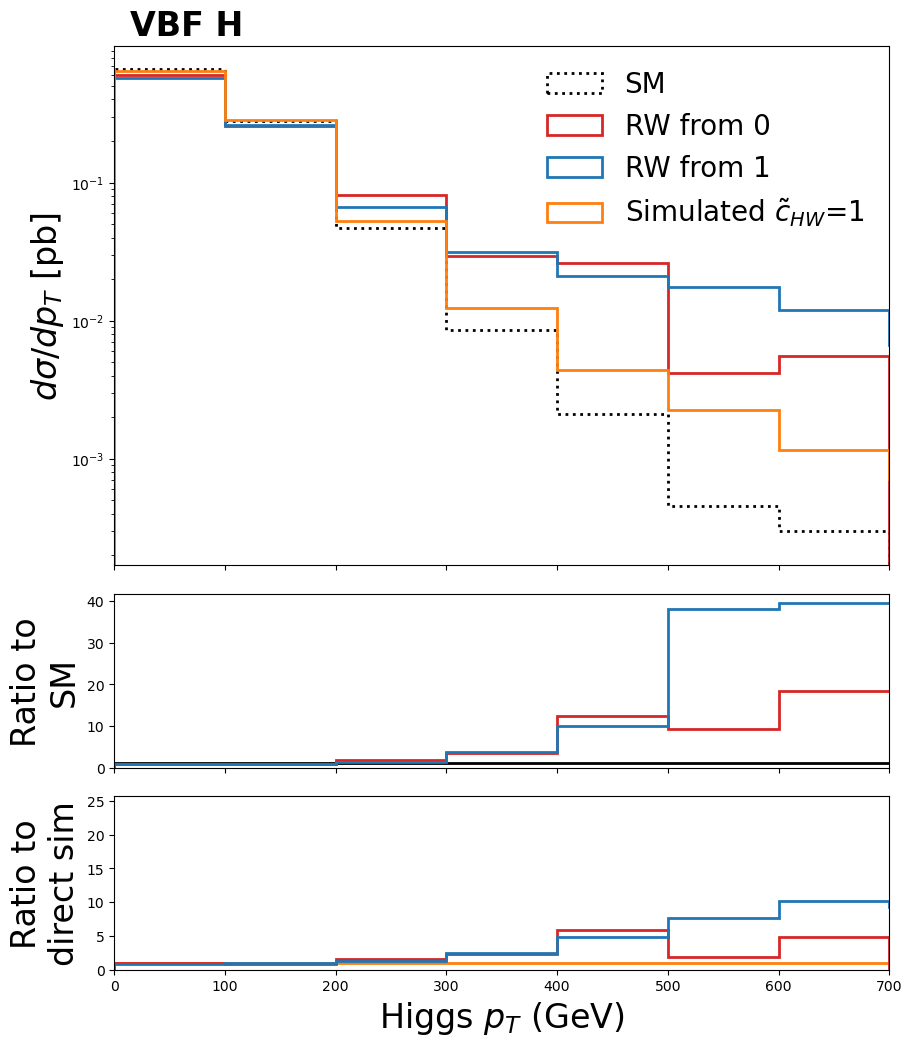

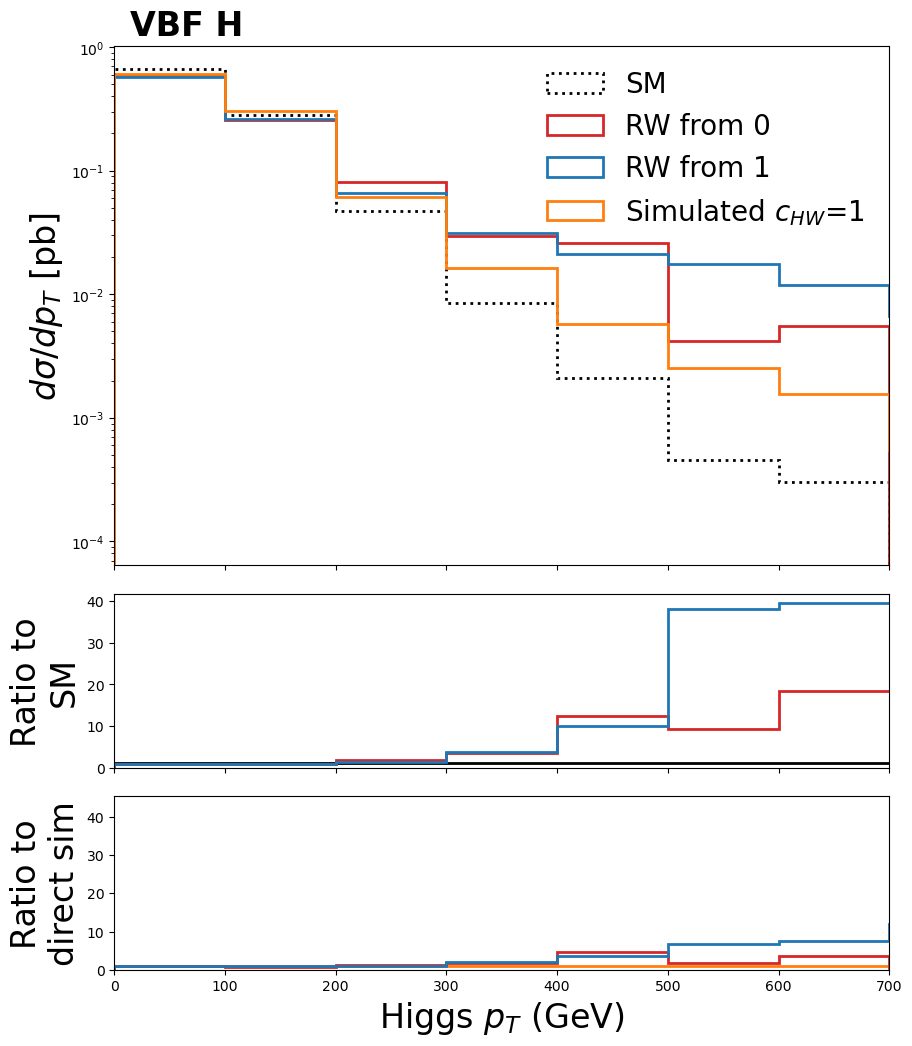

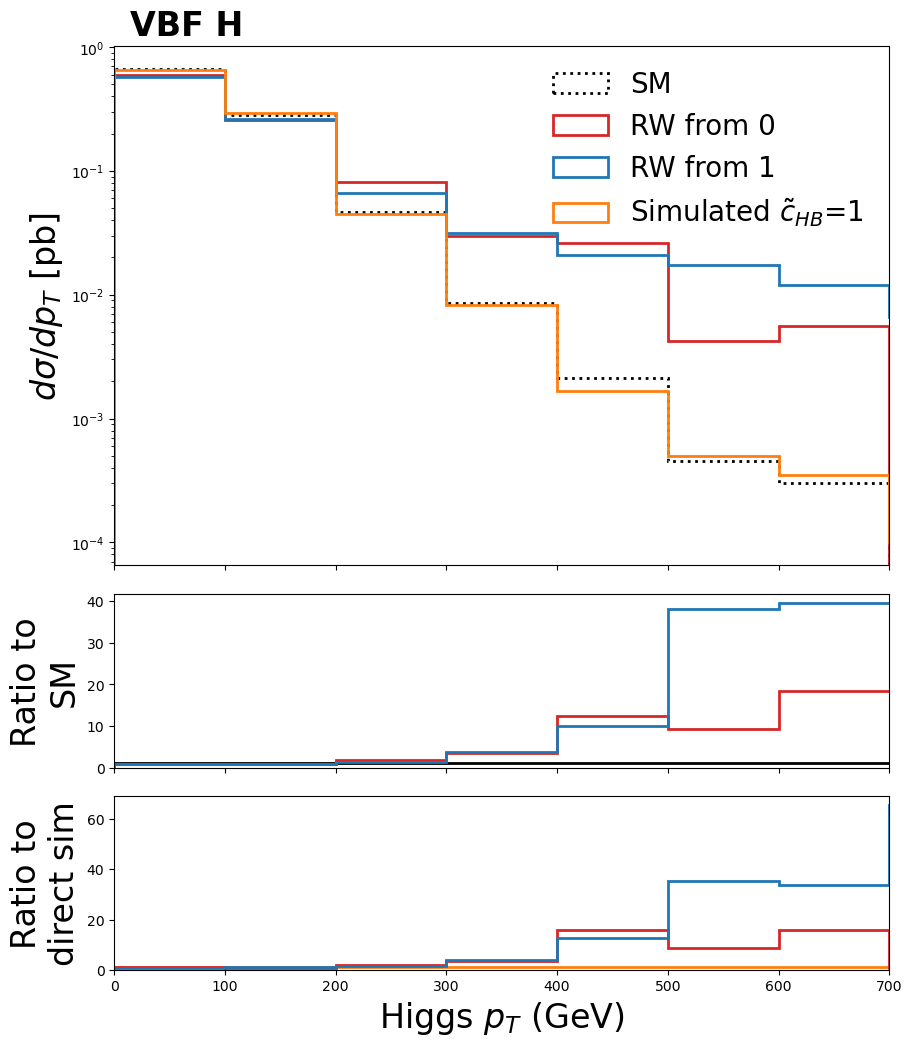

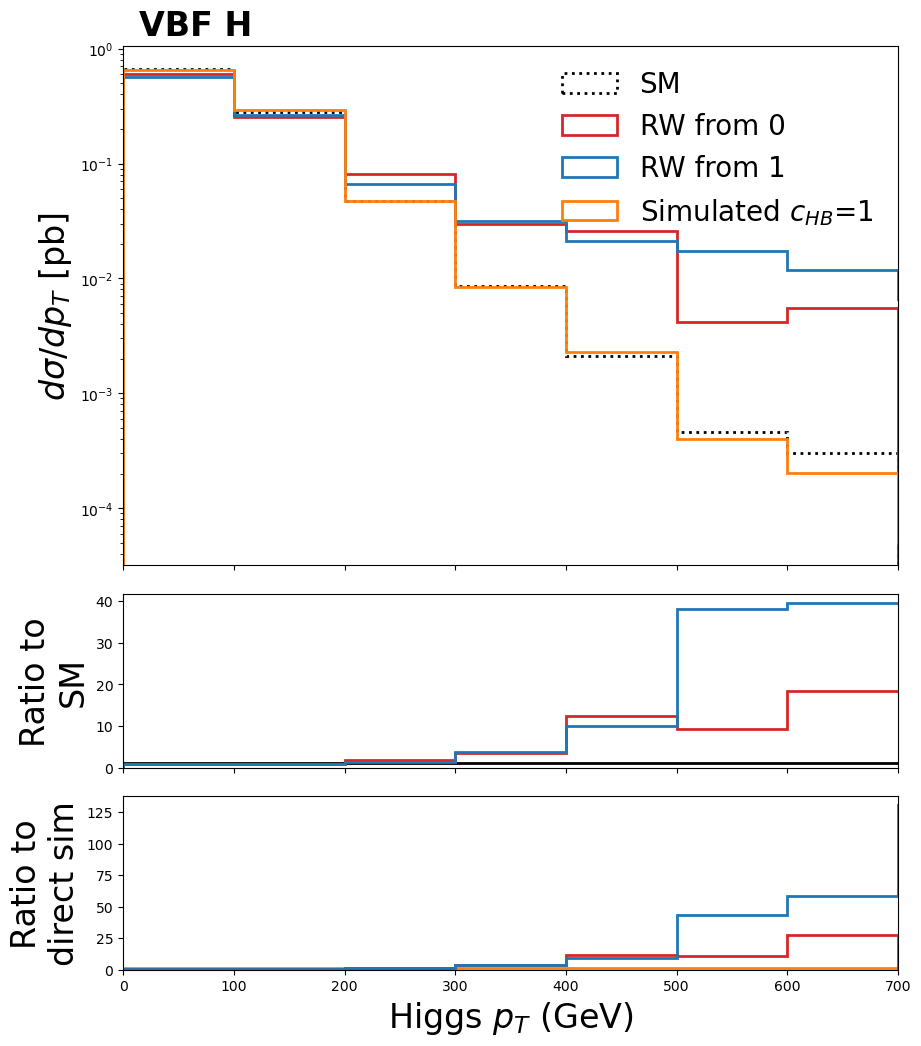

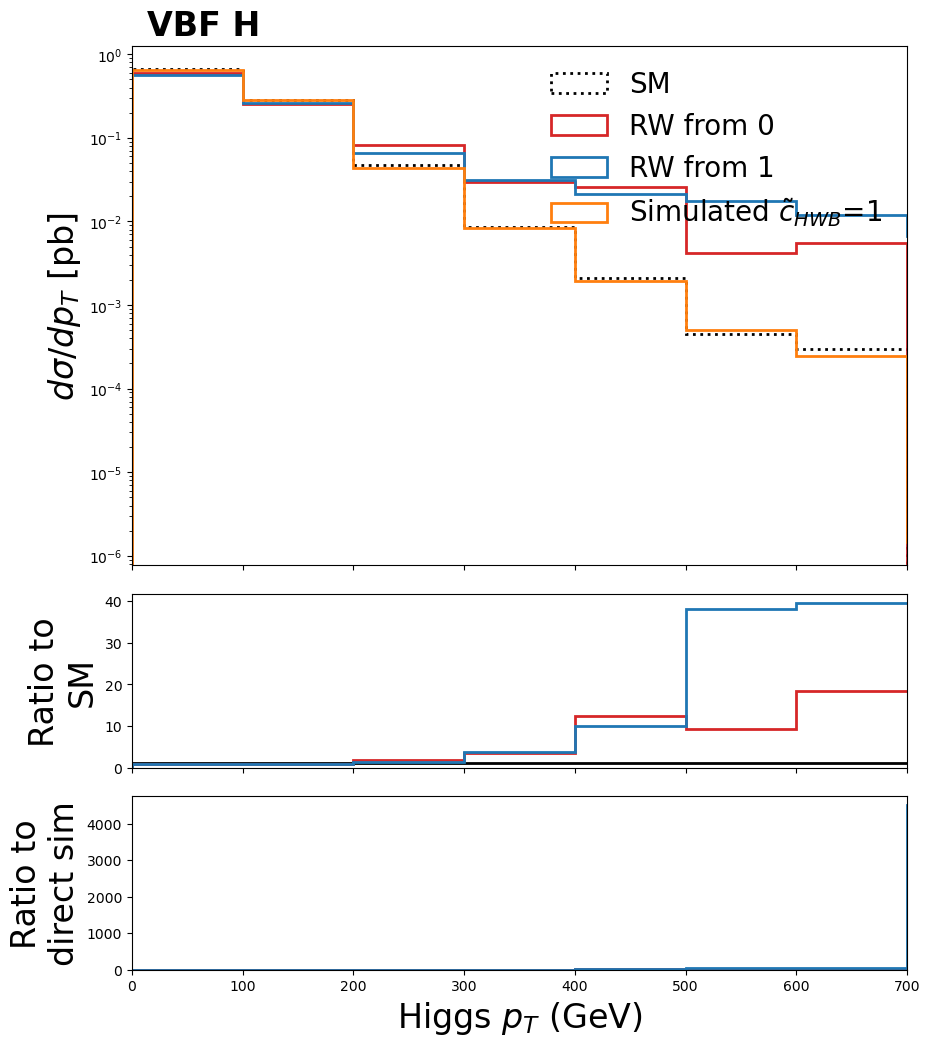

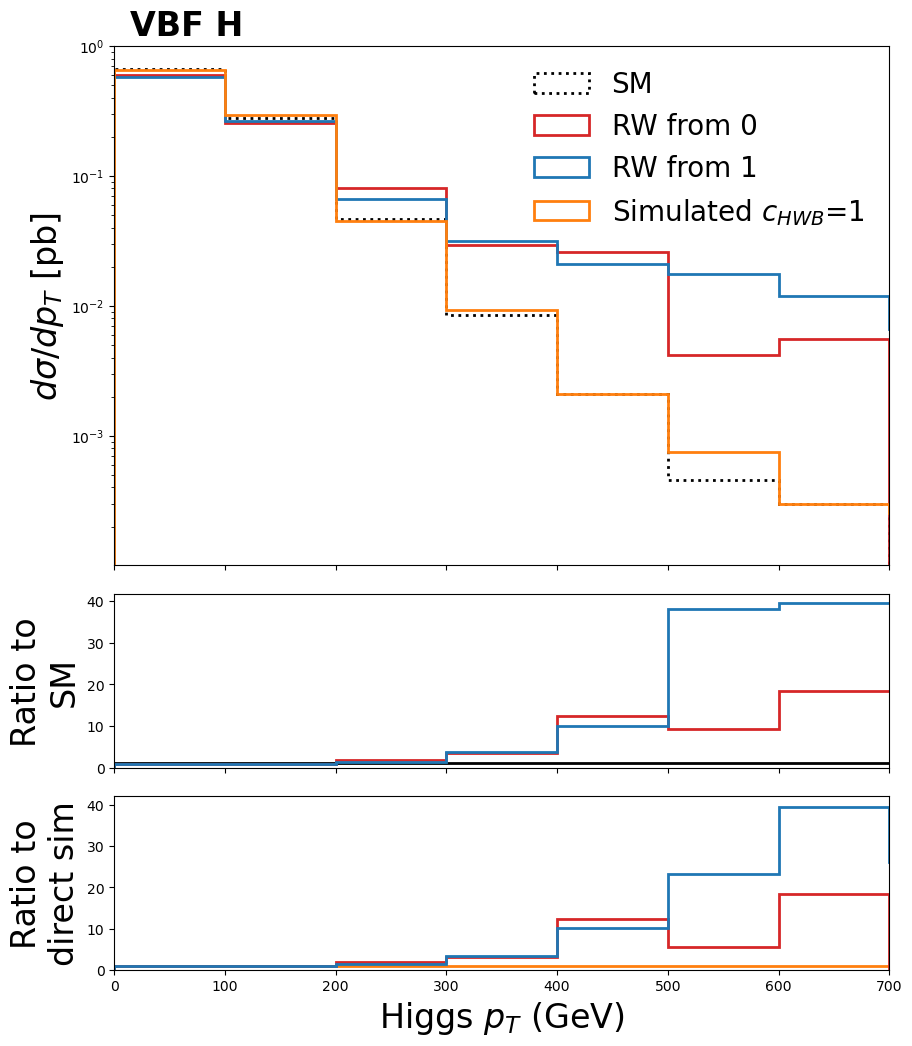

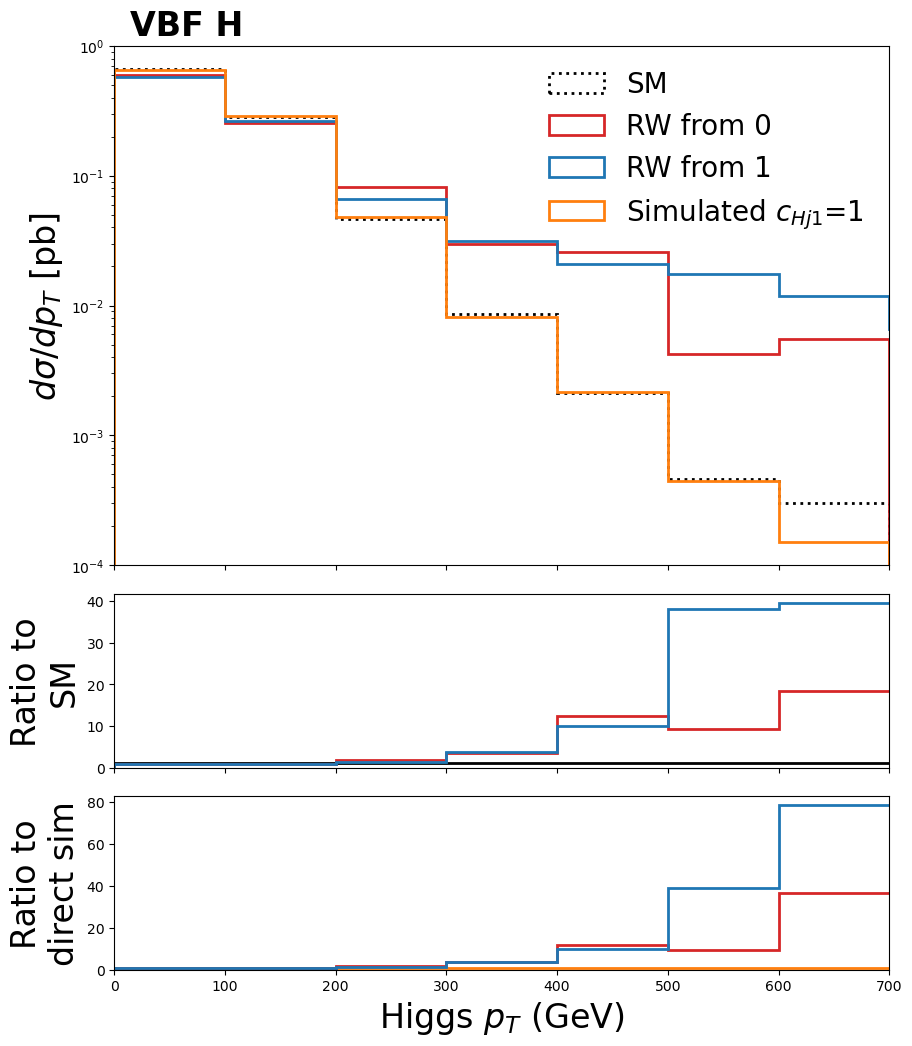

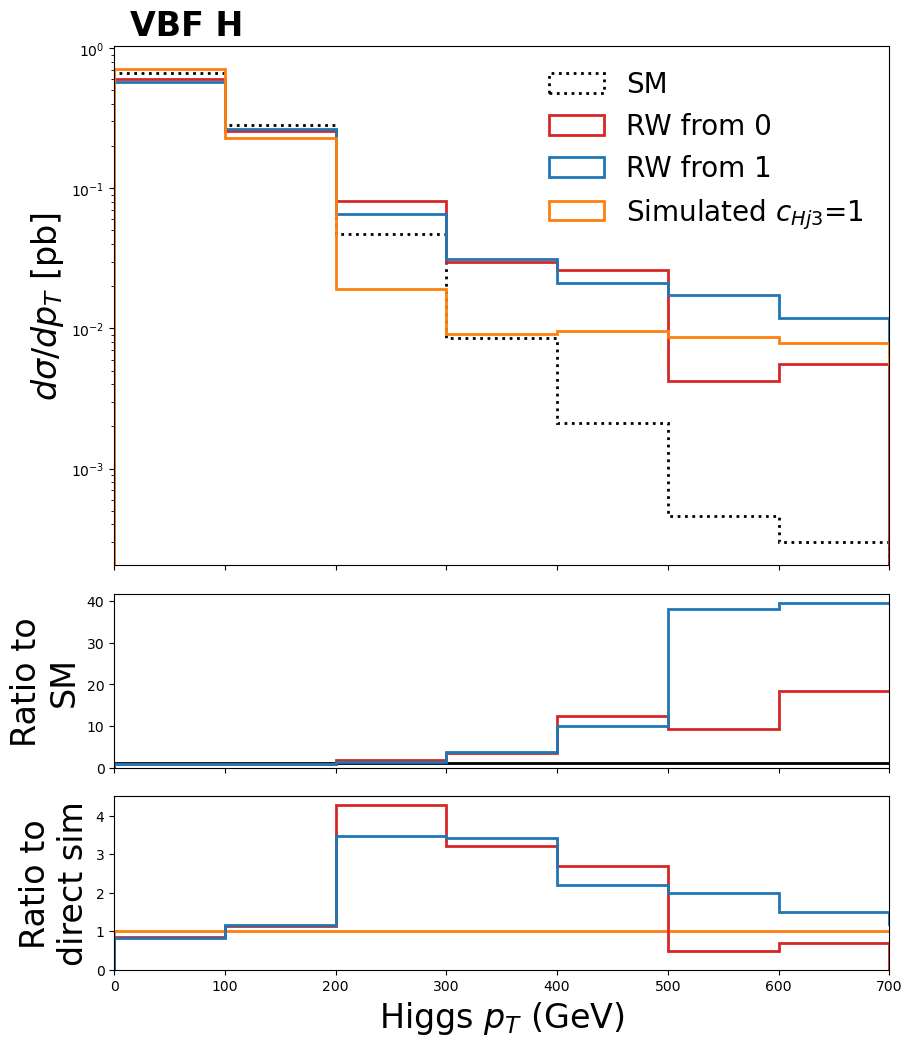

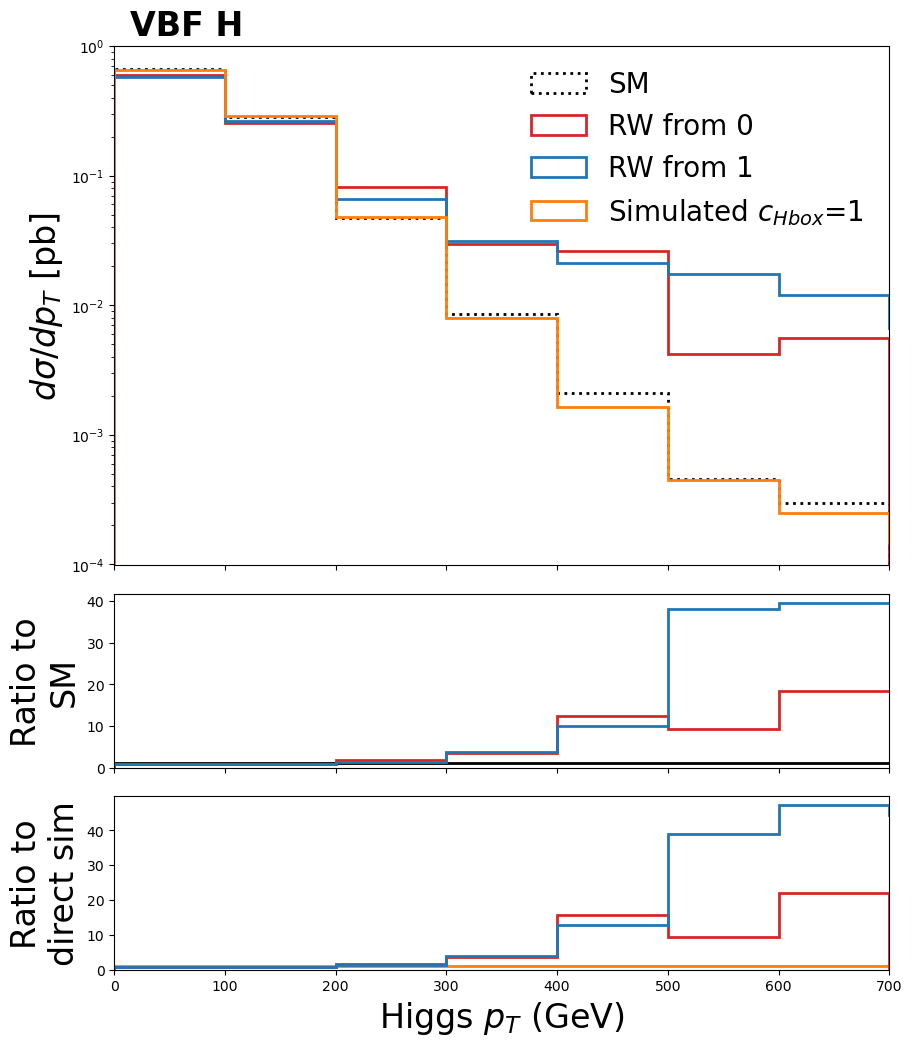

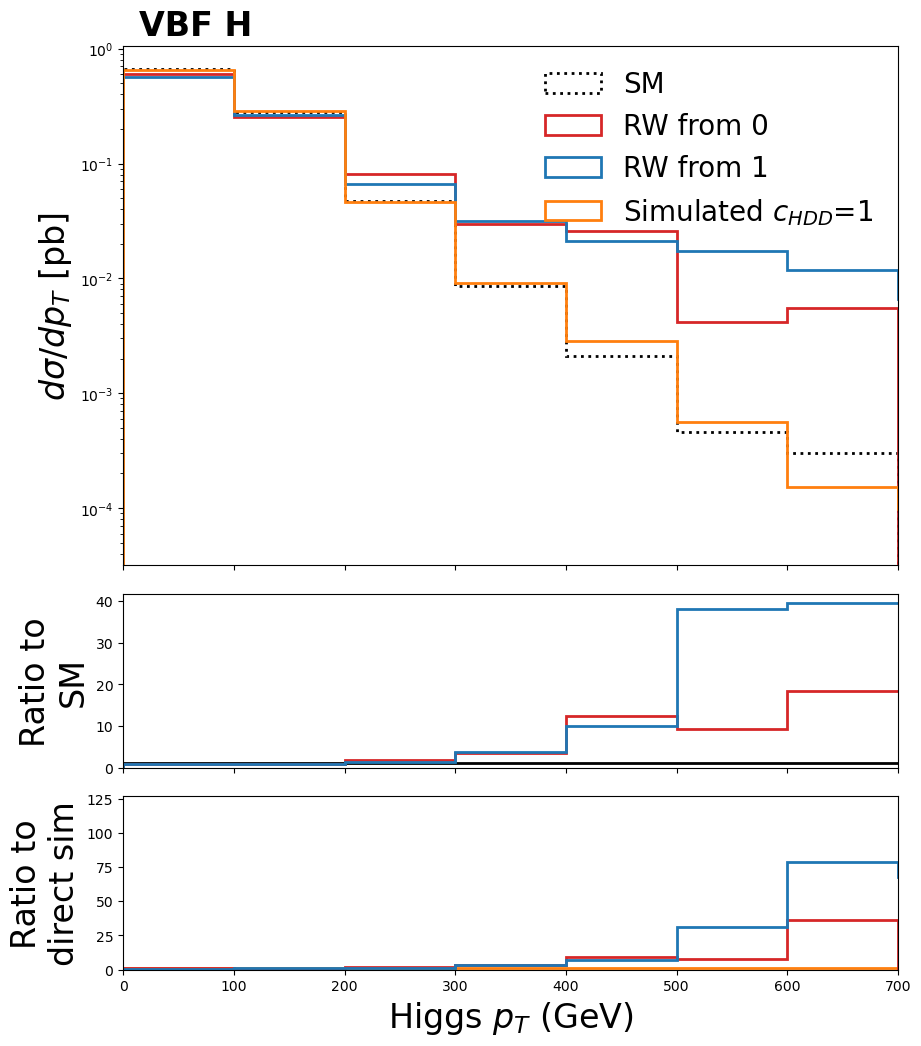

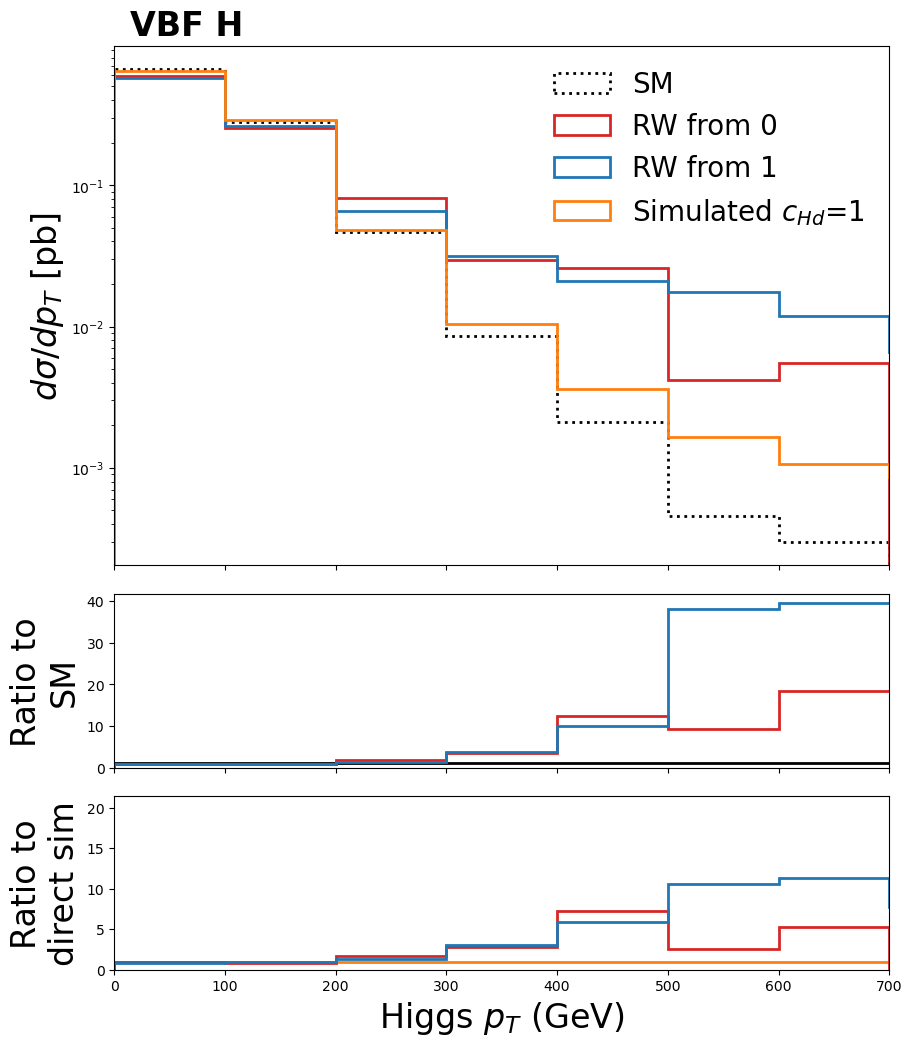

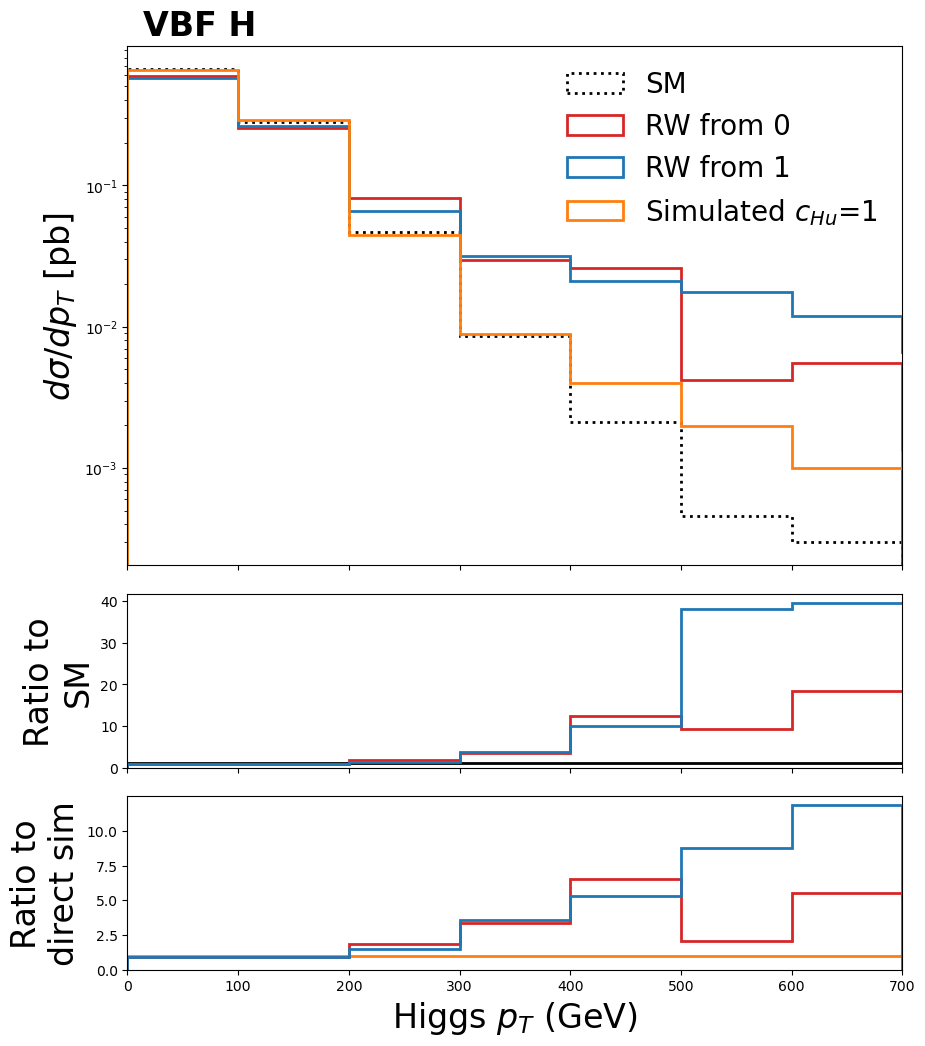

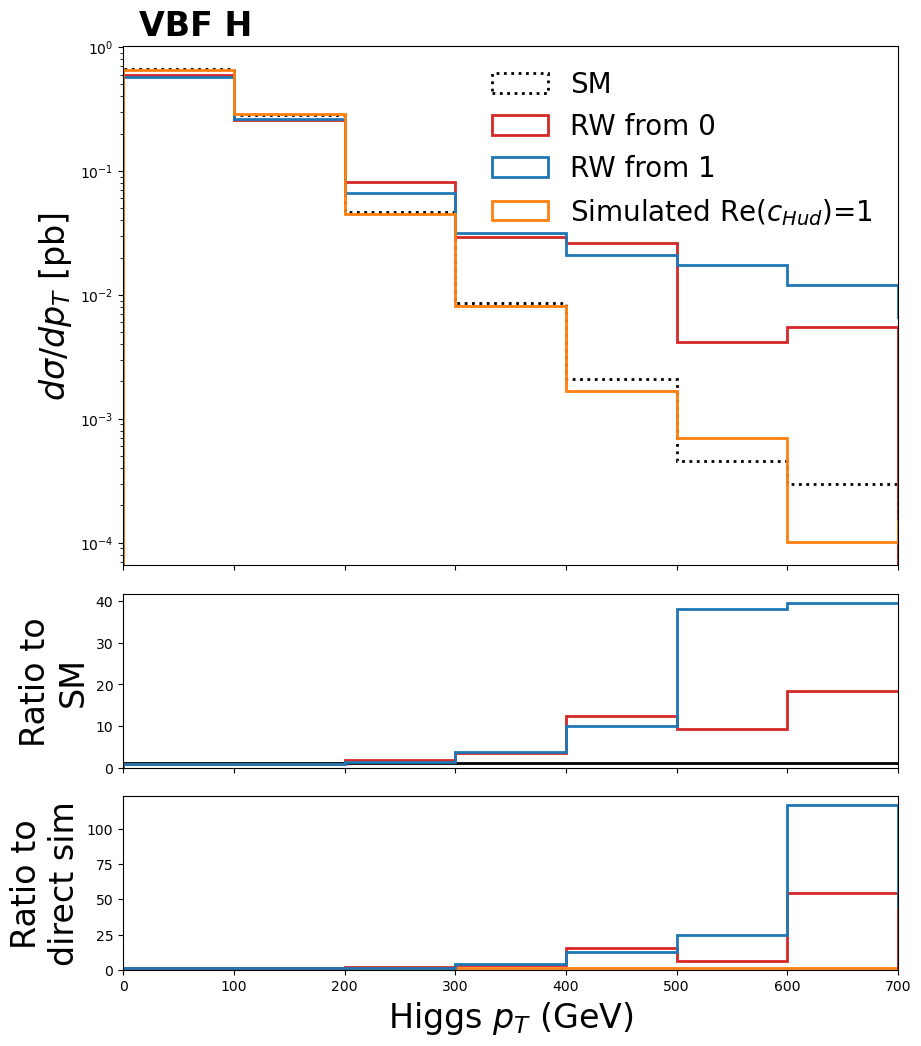

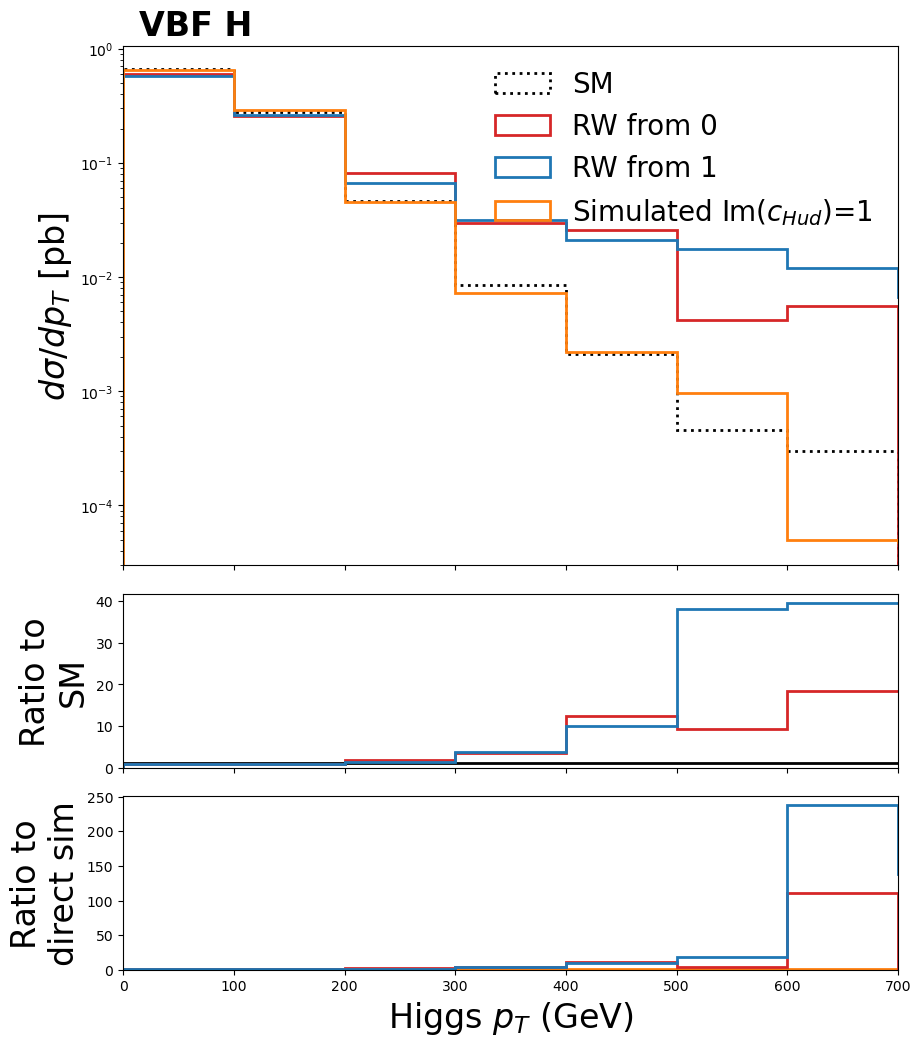

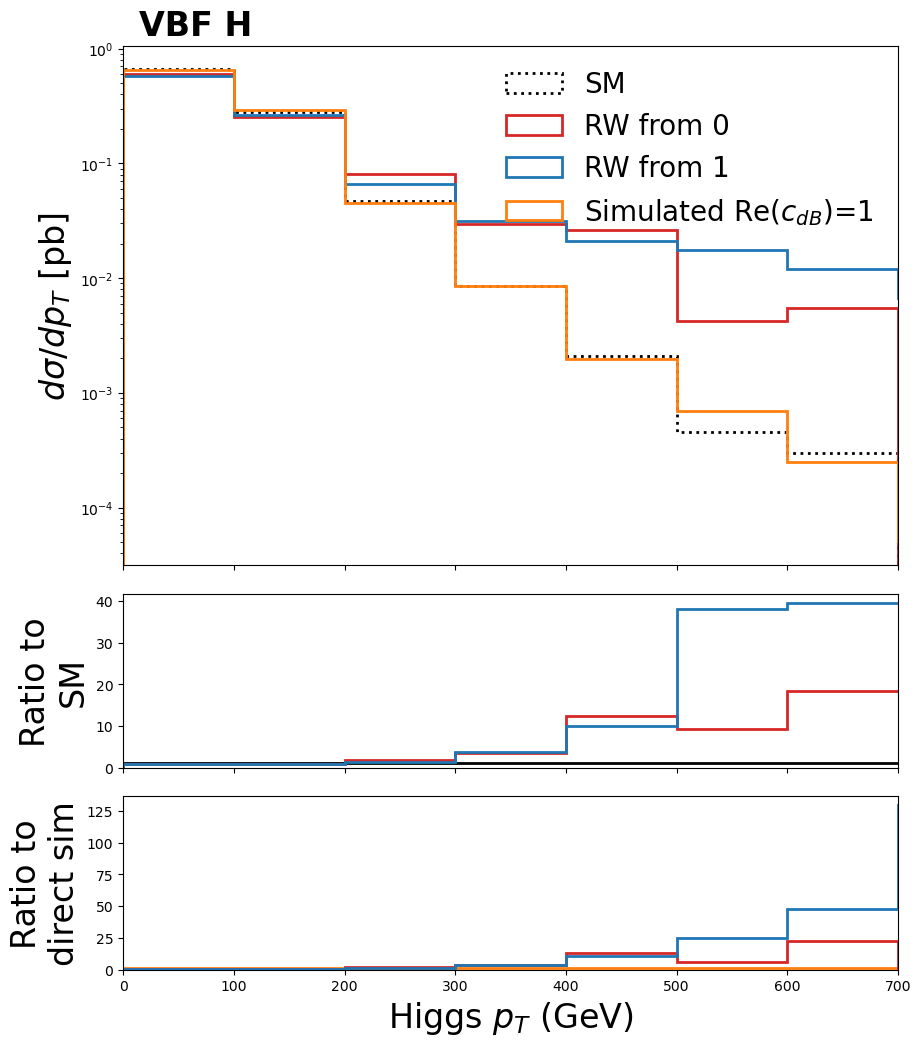

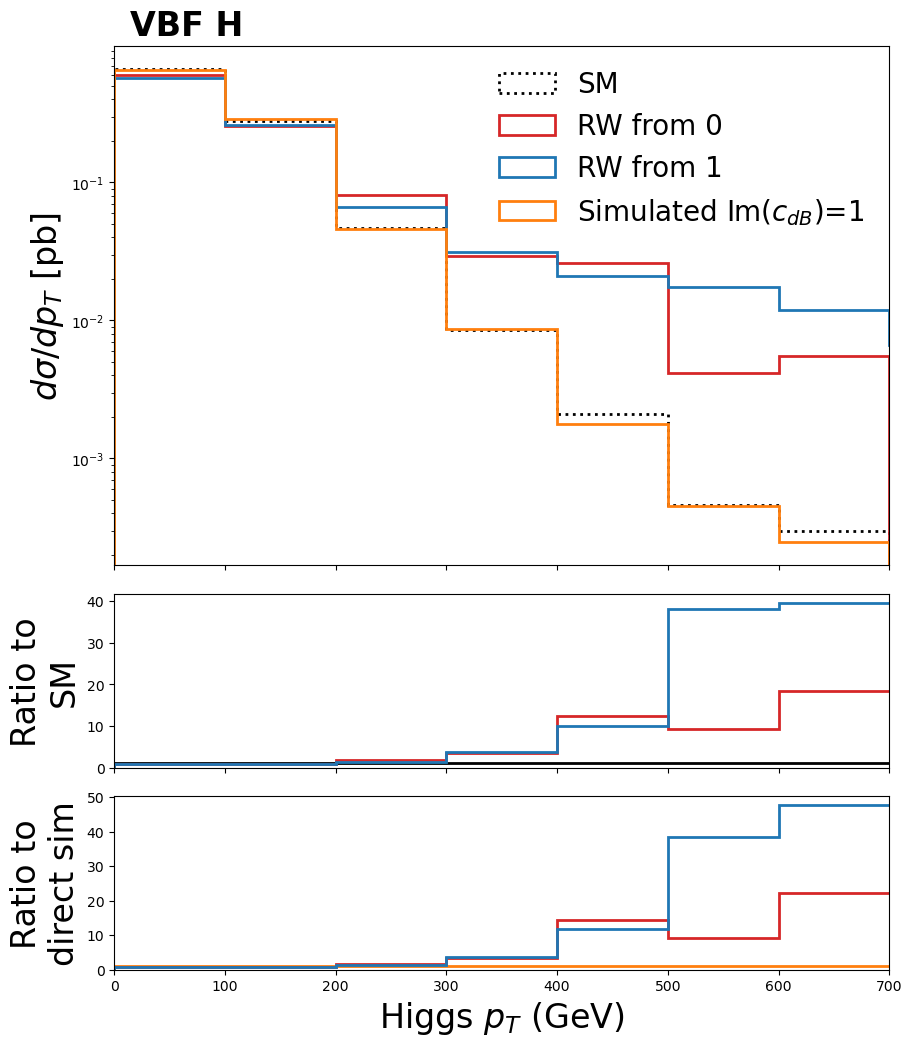

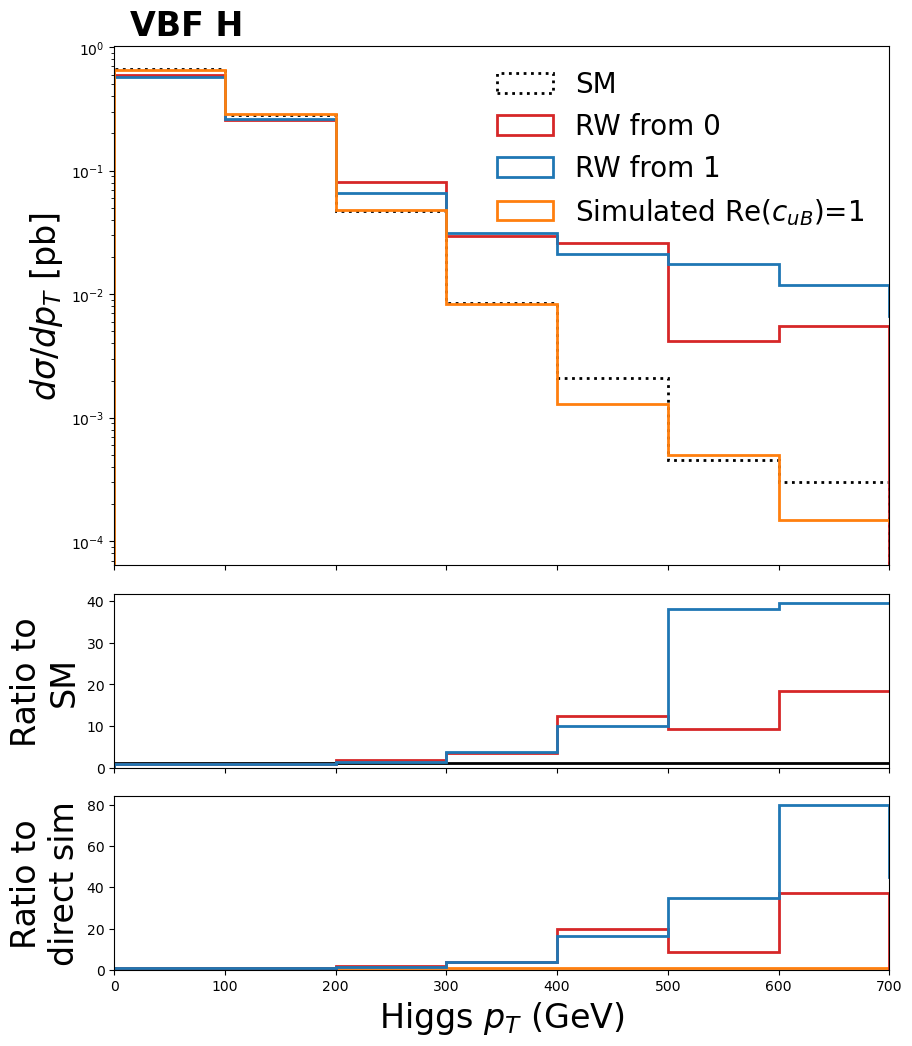

In [66]:
for wc in wcstring.keys():
    draw_hpt_wc1(wc)